In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('D:/Python Projects/Housing/archive/housing.csv')

In [151]:
data.info()             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [152]:
data.dropna(inplace=True)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [154]:
from sklearn.model_selection import train_test_split
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']



In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [156]:
train_data = X_train.join(y_train)

In [157]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13653,-117.33,34.03,14.0,1582.0,347.0,825.0,259.0,2.8281,INLAND,106300.0
3365,-120.54,40.29,17.0,3391.0,623.0,1529.0,571.0,3.4028,INLAND,91000.0
8088,-118.21,33.82,34.0,1719.0,398.0,1444.0,372.0,2.8438,NEAR OCEAN,139300.0
13210,-117.69,34.04,5.0,4459.0,896.0,2028.0,881.0,4.0096,INLAND,182600.0
10615,-117.80,33.67,4.0,3345.0,552.0,1525.0,539.0,6.7962,<1H OCEAN,329100.0
...,...,...,...,...,...,...,...,...,...,...
10698,-117.75,33.60,5.0,4944.0,1164.0,1727.0,948.0,4.9000,<1H OCEAN,255600.0
5520,-118.39,33.97,46.0,2198.0,352.0,839.0,335.0,6.5778,<1H OCEAN,350800.0
17961,-121.98,37.31,28.0,3840.0,629.0,1883.0,662.0,6.4095,<1H OCEAN,335900.0
16037,-122.46,37.72,45.0,2399.0,419.0,1225.0,399.0,4.0855,NEAR OCEAN,244100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

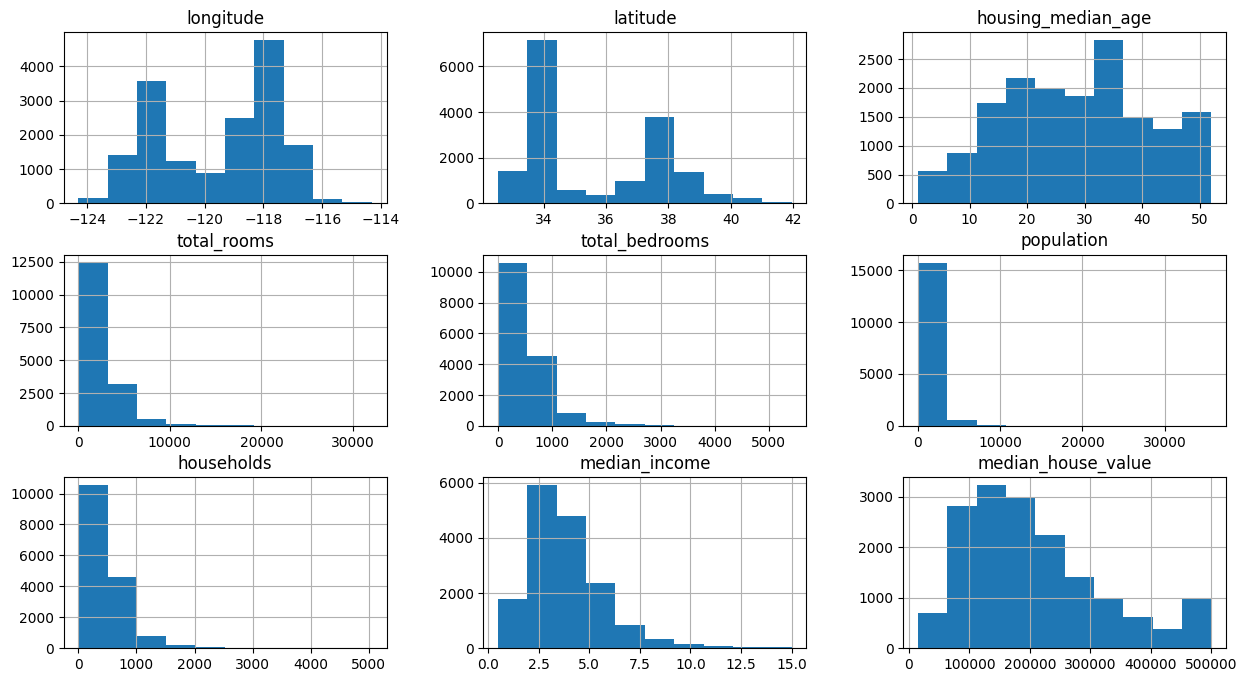

In [158]:
train_data.hist(figsize=(15, 8))

<Axes: >

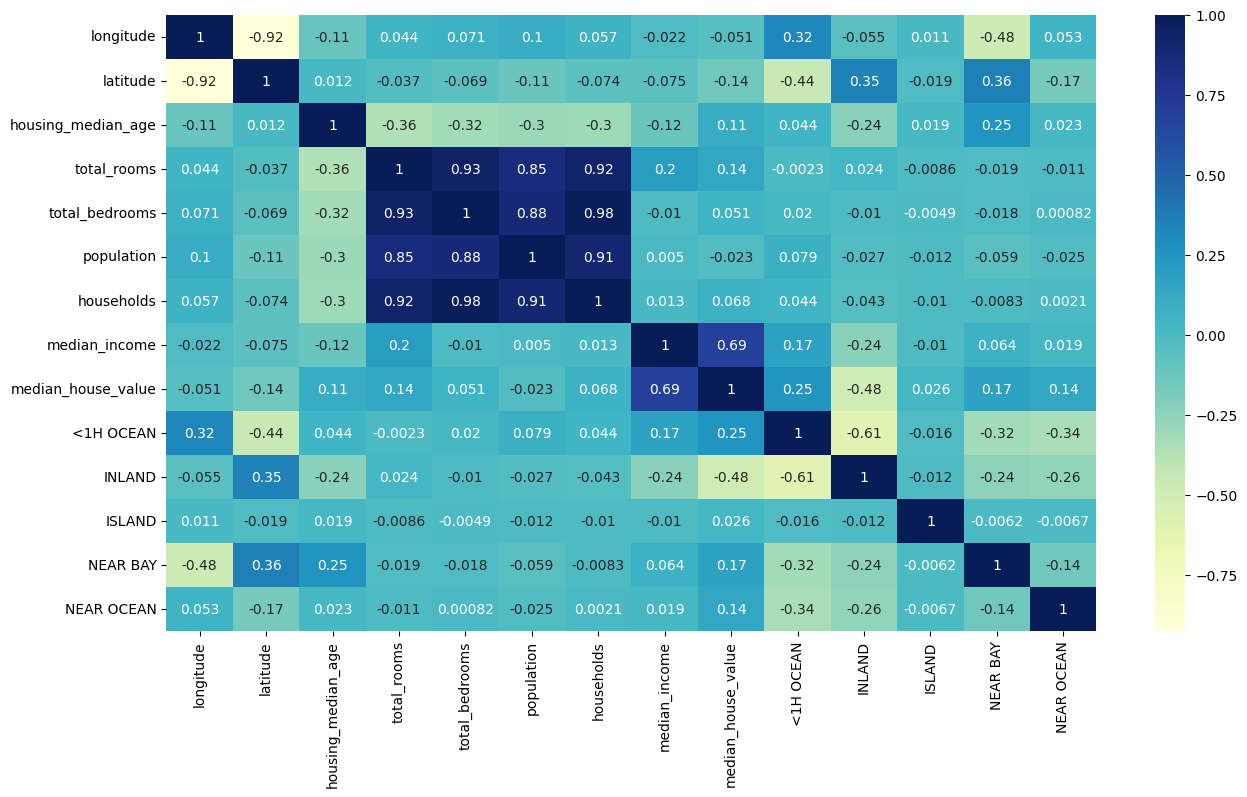

In [159]:
plt.figure(figsize=(15, 8))
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop('ocean_proximity', axis=1)
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [160]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

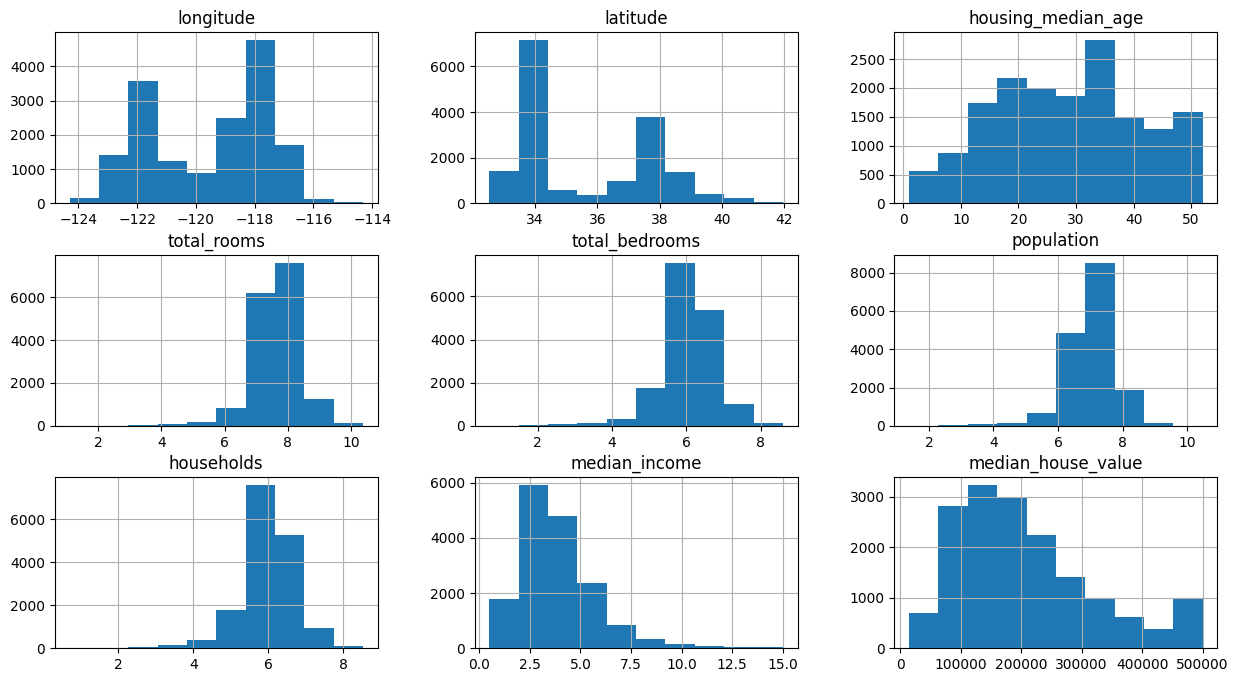

In [161]:
train_data.hist(figsize=(15, 8))

<Axes: >

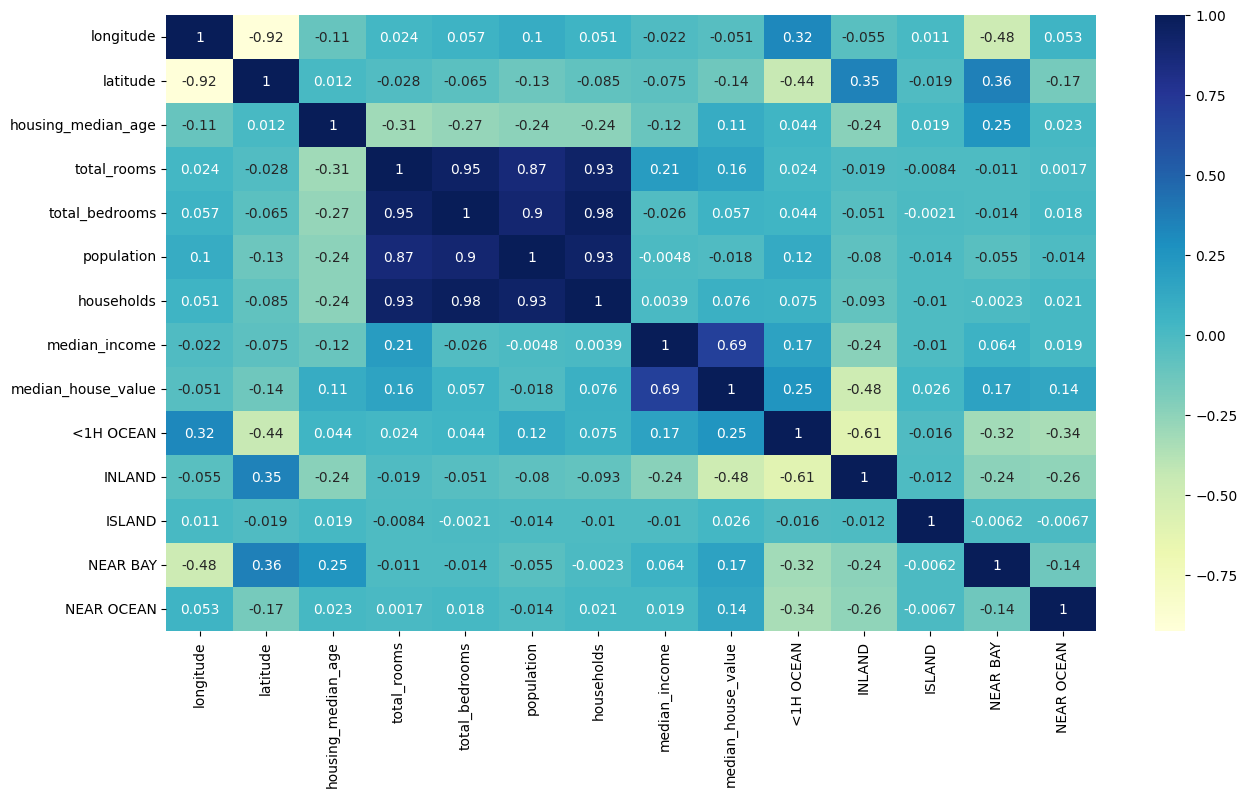

In [162]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<Axes: xlabel='latitude', ylabel='longitude'>

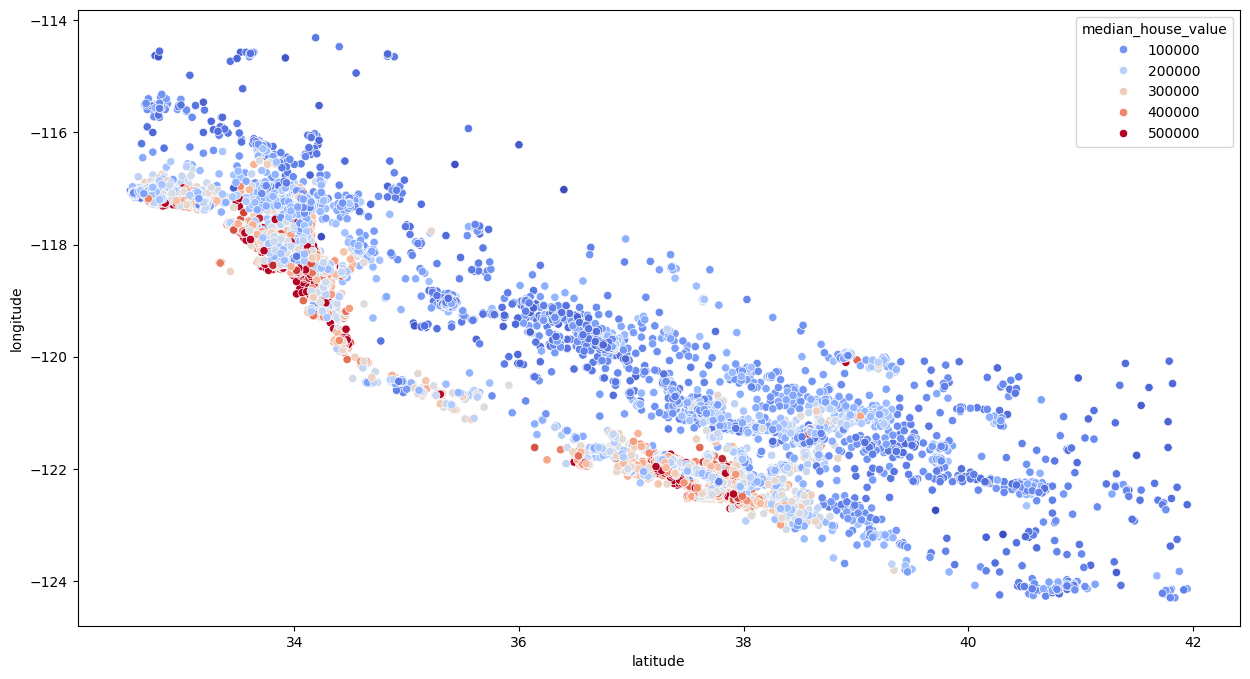

In [163]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [164]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

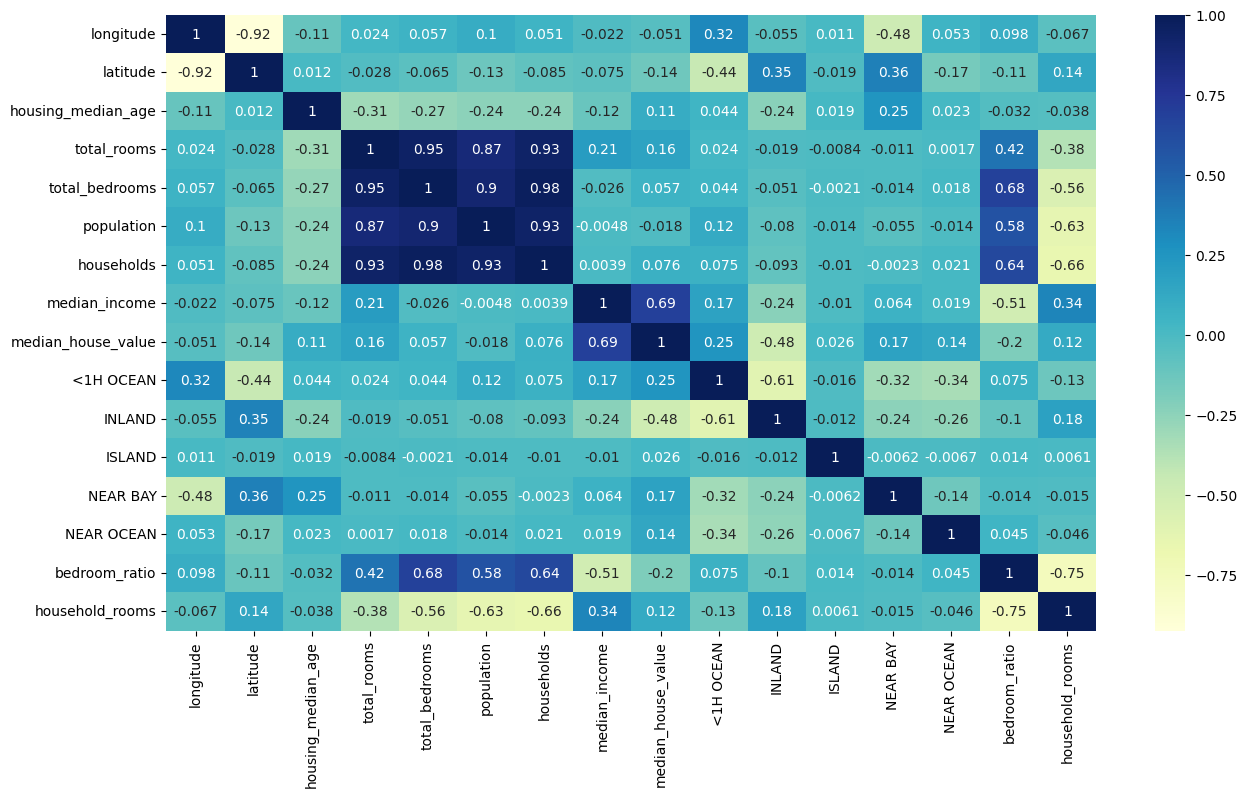

In [165]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [167]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop('ocean_proximity', axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [168]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [169]:
X_test_s = scaler.transform(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ISLAND


In [ ]:
reg.score(X_test_s, y_test)

0.6539128767478681

In [ ]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_s, y_test)

0.8033945399171731

In [175]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
para_grid = {
    'n_estimators': [100, 200 , 400],
    'min_samples_split': [2, 4],
    'max_depth': [None, 4, 8],
}

grid_search = GridSearchCV(forest, para_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True) 

grid_search.fit(X_train_s, y_train)

In [173]:
best_forest = grid_search.best_estimator_

In [174]:
best_forest.score(X_test_s, y_test)

-0.8315282467333005